In [1]:
#General imports.

%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
import matplotlib 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
def setint():
    mpld3.enable_notebook()
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10)
def noint():
    mpld3.disable_notebook()
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)


import ROOT as r
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import csv
import pandas

#import seaborn as sns
#sns.set(style="ticks", color_codes=True)
import numpy as np
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

plt.rcParams['figure.facecolor'] = 'white'

noint()

Welcome to JupyROOT 6.12/06


----

### Because the 9d is being deleted as we speak, lets try this for the 60h first

In [2]:
import csv
import time
import calendar

startTimeVec = []
timeFormat = "%Y-%m-%d %H:%M:%S"

with open('query_60h.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='|')
    line_count = 0
    for row in csv_reader:
        try:
            startTimeVec.append((int(row[0]), 
                                 time.strptime(row[3], timeFormat), 
                                 time.strptime(row[5],timeFormat),
                                calendar.timegm(time.strptime(row[3], timeFormat)),
                                calendar.timegm(time.strptime(row[5], timeFormat))))
        except:
            print("ERROR: ", row)
        
        line_count += 1
            

In [3]:
row

['15991',
 '2018-04-25 02:00:58.119998',
 'quad at 13.1, 18.3kV; kicker at 3.60,2.64,2.76; external',
 '2018-04-25 02:00:40',
 '1.30674382197369e+15',
 '2018-04-25 01:40:20',
 '0.887959820264264',
 'Albahri and Valetov',
 '/data1/gm2',
 '25377',
 '305538822076',
 '1185480',
 'Y']

In [4]:
startTimeVec[1]

(15922,
 time.struct_time(tm_year=2018, tm_mon=4, tm_mday=22, tm_hour=15, tm_min=12, tm_sec=45, tm_wday=6, tm_yday=112, tm_isdst=-1),
 time.struct_time(tm_year=2018, tm_mon=4, tm_mday=22, tm_hour=14, tm_min=8, tm_sec=44, tm_wday=6, tm_yday=112, tm_isdst=-1),
 1524409965,
 1524406124)

In [5]:
ding = startTimeVec[1][2]

In [6]:
print(ding)

time.struct_time(tm_year=2018, tm_mon=4, tm_mday=22, tm_hour=14, tm_min=8, tm_sec=44, tm_wday=6, tm_yday=112, tm_isdst=-1)


In [7]:
calendar.timegm(ding)

1524406124

In [8]:
dfrun = pandas.DataFrame(startTimeVec, columns=['run','timeend_full','timestart_full','timeend','timestart'])

In [9]:
dfrun['deltat'] = dfrun['timeend'] - dfrun['timestart'] 

In [10]:
dfrun.head()

,run,timeend_full,timestart_full,timeend,timestart,deltat
0,15921,"(2018, 4, 22, 14, 3, 5, 6, 112, -1)","(2018, 4, 22, 13, 13, 52, 6, 112, -1)",1524405785,1524402832,2953
1,15922,"(2018, 4, 22, 15, 12, 45, 6, 112, -1)","(2018, 4, 22, 14, 8, 44, 6, 112, -1)",1524409965,1524406124,3841
2,15923,"(2018, 4, 22, 16, 16, 28, 6, 112, -1)","(2018, 4, 22, 15, 12, 55, 6, 112, -1)",1524413788,1524409975,3813
3,15924,"(2018, 4, 22, 17, 20, 19, 6, 112, -1)","(2018, 4, 22, 16, 16, 38, 6, 112, -1)",1524417619,1524413798,3821
4,15925,"(2018, 4, 22, 18, 24, 53, 6, 112, -1)","(2018, 4, 22, 17, 20, 42, 6, 112, -1)",1524421493,1524417642,3851


In [11]:
dfrun.describe()

,run,timeend,timestart,deltat
count,64.000000,6.400000e+01,6.400000e+01,64.000000
mean,15953.843750,1.524517e+09,1.524514e+09,3279.359375
std,20.432792,6.222711e+04,6.247723e+04,1136.770507
min,15921.000000,1.524406e+09,1.524403e+09,97.000000
25%,15936.750000,1.524468e+09,1.524464e+09,3370.000000
50%,15952.500000,1.524521e+09,1.524519e+09,3775.500000
75%,15970.500000,1.524567e+09,1.524566e+09,3826.500000
max,15991.000000,1.524622e+09,1.524620e+09,4473.000000


---

### and also getting the temperatures for that period of time along with their timestamps

In [12]:
filelist = ["./allcalo_60h_temps.csv"]
print(filelist)

['./allcalo_60h_temps.csv']


In [13]:
tempVec = []
timeFormatTemp = "%Y-%m-%d %H:%M:%S.%f" # 2018-05-12 09:51:38.169989 |

for file in filelist:
    #tempVeci = []

    with open(file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='|')
        line_count = 0
        for row in csv_reader:
            try:
                caloNum = int((row[1].split("calo"))[1].split('temps')[0])
                ding = []
                for x in row[2][1:-1].split(','):
                    if float(x) > 0 and float(x) < 100:
                        ding.append(float(x))
                    else:
                        ding.append(float('nan'))
                #print(ding)
                tempVec.append((caloNum, ding, np.nanmean(ding), 
                                time.strptime(row[3], timeFormatTemp), 
                                calendar.timegm(time.strptime(row[3], timeFormatTemp)) ))
            except:
                print("ERROR: ", row)

                line_count += 1
                if(line_count > 50):
                    break
            
    #tempVec.append(tempVeci)

#print(tempVec)

ERROR:  ['40049820', 'calo23temps', '{0,36.25,35.9375,36.875,37.8125,38.75,39.4375,41.1875,39.5625,0,35.8125,36.1875,37.625,38.5,39.4375,40.8125,41.1875,39.5,0,0,37.3125,37.25,39.3125,0,41.5625,43,41.375,0,36.25,37.9375,0,40.3125,41.25,41.375,0,41.4375,0,34.9375,36,37.5625,39.125,39.625,41,42.8125,41.3125,0,35.8125,36.1875,37.8125,38.75,39.5,0,41.8125,40.0625}', '2018-04-23 01:26:32', 't']


In [14]:
df = pandas.DataFrame(tempVec, columns=['calo','temps','avgtemp','timefull','time'])

In [15]:
df.head()

,calo,temps,avgtemp,timefull,time
0,18,"[nan, 35.1875, 36.1875, 36.5625, 37.125, 37.37...",37.909722,"(2018, 4, 25, 3, 40, 4, 2, 115, -1)",1524627604
1,10,"[nan, 35.5, 36.3125, 36.6875, 37.5625, 38.4375...",38.774457,"(2018, 4, 25, 3, 40, 4, 2, 115, -1)",1524627604
2,3,"[nan, 35.5, 36.0625, 36.9375, 37.5625, 37.6875...",38.280556,"(2018, 4, 25, 3, 40, 4, 2, 115, -1)",1524627604
3,16,"[nan, 37.5, 37.3125, 37.375, 38.6875, 39.875, ...",39.565476,"(2018, 4, 25, 3, 40, 4, 2, 115, -1)",1524627604
4,24,"[nan, 36.0625, 36.25, 37.1875, 38.1875, 38.562...",39.205163,"(2018, 4, 25, 3, 40, 4, 2, 115, -1)",1524627604


In [16]:
df.describe()

,calo,avgtemp,time
count,180553.000000,180553.000000,1.805530e+05
mean,12.498674,38.705242,1.524515e+09
std,6.922205,0.840601,6.515642e+04
min,1.000000,36.015625,1.524402e+09
25%,6.000000,38.173611,1.524458e+09
50%,12.000000,38.729167,1.524514e+09
75%,18.000000,39.242424,1.524571e+09
max,24.000000,42.908854,1.524628e+09


In [17]:
df1 = df.loc[ df['calo'] == 1 ]

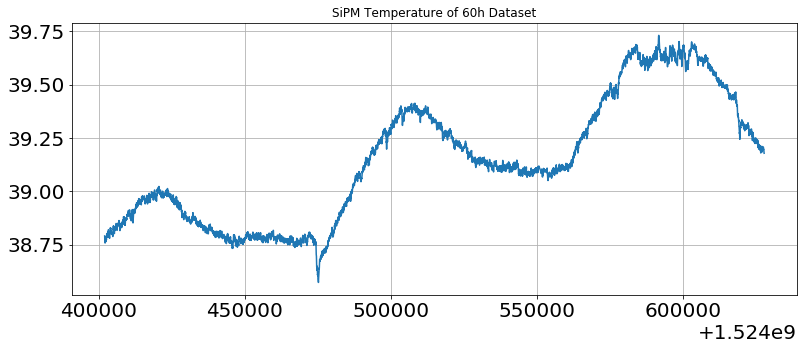

In [18]:
fig, ax = plt.subplots(figsize=(13,5))
plt.title("SiPM Temperature of 60h Dataset")
plt.plot(df1['time'], df1["avgtemp"])
runRecs = []
for i, row in dfrun.iterrows():
    ding = matplotlib.patches.Rectangle([row['timestart'], 42], row['timeend'] - row['timestart'], 2, color='red', alpha=0.5)
    runRecs.append(ding)
for rec in runRecs:
    ax.add_patch(rec)
    
plt.grid()

plt.show()

In [19]:
meanTemps = []
for i, row in dfrun.iterrows():
    dfi = (df.loc[df['time'] > row['timestart']]).loc[df['time'] < row['timeend']]
    
    meani = dfi['avgtemp'].mean()
    meanTemps.append((row['run'], meani ))


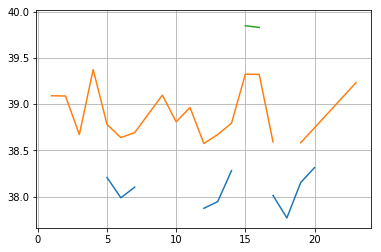

In [32]:
runs, temps = zip(*meanTemps)
plt.plot(runs,temps)
plt.grid()
plt.show()

good calos:  [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23]


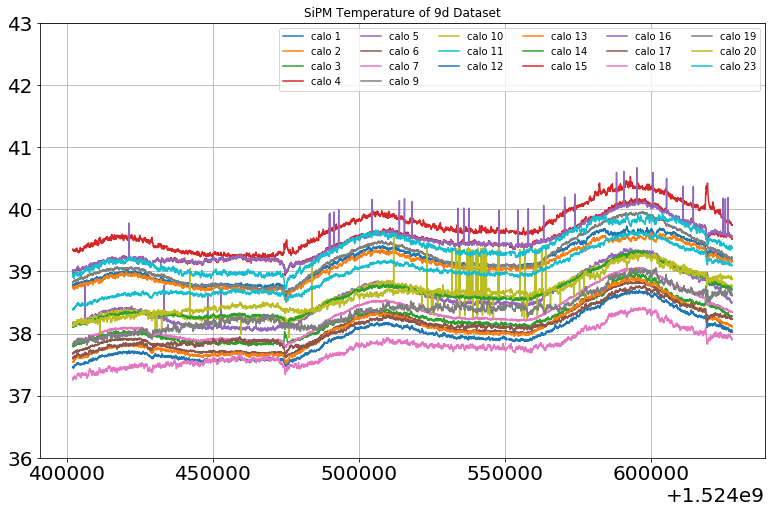

In [21]:
fig, ax = plt.subplots(figsize=(13,8))

#goodcalos = [i for i in range(1,16)]+[i for i in range(17,21)]+[i for i in range(23,24)]
goodcalos = [i for i in range(1,8)]+[i for i in range(9,21)]+[i for i in range(23,24)]
print("good calos: ", goodcalos)

for calo in goodcalos:
    df1 = df.loc[ df['calo'] == calo ]
    plt.title("SiPM Temperature of 9d Dataset")
    plt.plot(df1['time'], df1["avgtemp"], label='calo '+str(calo))
runRecs = []
for i, row in dfrun.iterrows():
    ding = matplotlib.patches.Rectangle([row['timestart'], 42], row['timeend'] - row['timestart'], 2, color='red', alpha=0.5)
    runRecs.append(ding)
#for rec in runRecs:
#    ax.add_patch(rec)
    
plt.grid()
plt.ylim(36,43)

plt.legend(ncol=6)
plt.show()

In [22]:
avgtempvec = []
for calo in goodcalos:
    df1 = df.loc[ df['calo'] == calo ]
    ding = df1['avgtemp'].mean()
    avgtempvec.append(ding)

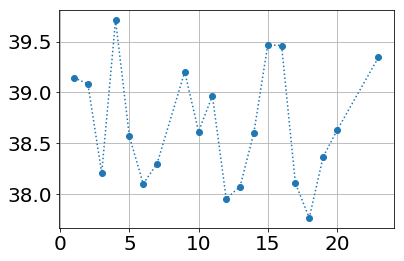

In [23]:
plt.plot(goodcalos,avgtempvec,":o")
plt.grid()
plt.show()

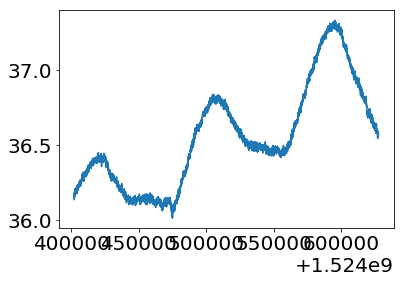

In [24]:
df1 = df.loc[ df['calo'] == 8 ]
plt.plot(df1['time'],df1['avgtemp'])

In [112]:
meanTemps = []
for calo in goodcalos:
    for i, row in dfrun.iterrows():
        dfi = (df.loc[df['time'] > row['timestart']]).loc[df['time'] < row['timeend']].loc[df['calo'] == calo]

        meani = dfi['avgtemp'].mean()
        meanTemps.append((calo, row['run'], meani, row['timestart'],row['timeend'], len(dfi.index)))

In [113]:
meanTemps[:10]

[(1, 15921, 38.807412131519285, 1524402832, 1524405785, 98),
 (1, 15922, 38.85216408268732, 1524406124, 1524409965, 129),
 (1, 15923, 38.90697725284337, 1524409975, 1524413788, 127),
 (1, 15924, 38.959470691163574, 1524413798, 1524417619, 127),
 (1, 15925, 38.98600344530579, 1524417642, 1524421493, 129),
 (1, 15926, 38.9819767441861, 1524421531, 1524425415, 129),
 (1, 15927, 38.935852999016724, 1524425443, 1524428813, 113),
 (1, 15928, 38.87422839506173, 1524428849, 1524432635, 126),
 (1, 15929, 38.846336395450564, 1524432672, 1524436498, 127),
 (1, 15930, 38.81376357560565, 1524436531, 1524440495, 133)]

In [114]:
dfavg = pandas.DataFrame(meanTemps, columns=['calo','run','avgtemp','timestart','timeend','nentries'])

In [115]:
dfavg.head()

,calo,run,avgtemp,timestart,timeend,nentries
0,1,15921,38.807412,1524402832,1524405785,98
1,1,15922,38.852164,1524406124,1524409965,129
2,1,15923,38.906977,1524409975,1524413788,127
3,1,15924,38.959471,1524413798,1524417619,127
4,1,15925,38.986003,1524417642,1524421493,129


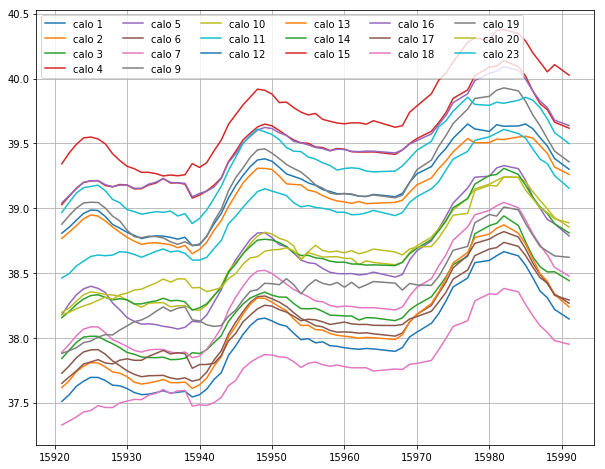

In [111]:
fig, ax = plt.subplots(figsize=(10,8))
swingvec = []
for calo in goodcalos:
    dfi = dfavg.loc[dfavg['calo'] == calo].loc[dfavg['run'] < 16400]
    plt.plot(dfi['run'], dfi['avgtemp'], label='calo '+str(calo))
    swingvec.append( dfi['avgtemp'].max() - dfi['avgtemp'].min() )
plt.legend(ncol=6)
plt.grid()
plt.show()

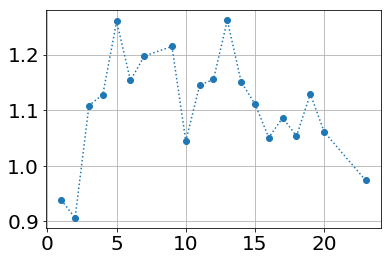

In [29]:
plt.plot(goodcalos,swingvec,'o:')
plt.grid()
plt.show()

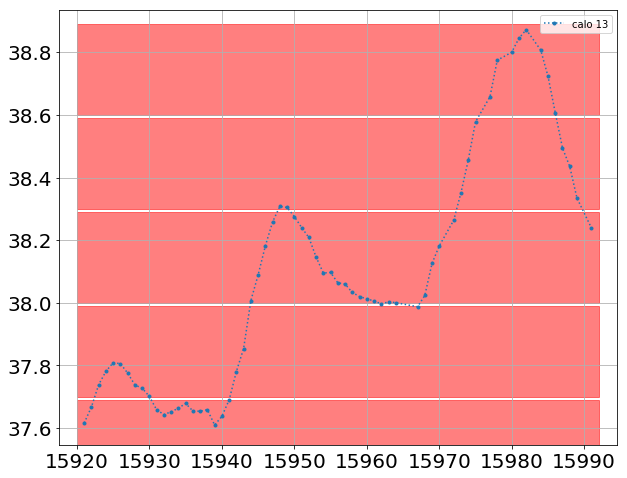

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
for calo in range(13,14):
    dfi = dfavg.loc[dfavg['calo'] == calo]
    plt.plot(dfi['run'], dfi['avgtemp'], ':.', label='calo '+str(calo))
    
runsByTemp = []
runRecs = []
centerTemps = []
meanTemps =[]

tempwidth = 3
for i in range(374,388,tempwidth):
    centerTemps.append((i/10. + (i+tempwidth)/10.)/2.)
    dfi2 = dfavg.loc[dfavg['calo'] == calo].loc[dfavg['avgtemp'] > i/10.].loc[dfavg['avgtemp'] < (i+tempwidth)/10.]
    runsByTemp.append(dfi2['run'].tolist())
    meanTemps.append( dfi2['avgtemp'].mean() )
    edge = i/10.
    ding = matplotlib.patches.Rectangle([15920, edge], 72 , tempwidth/10. - 0.01, 
                                        color='red', alpha=0.5)
    runRecs.append(ding)
for rec in runRecs:
    ax.add_patch(rec)
    
plt.legend(ncol=6)
plt.grid()
plt.show()

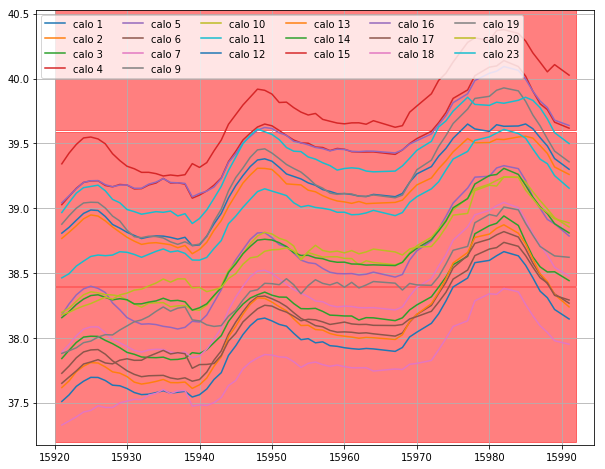

In [120]:
setint()
fig, ax = plt.subplots(figsize=(10,8))
for calo in goodcalos:
    dfi = dfavg.loc[dfavg['calo'] == calo].loc[dfavg['run'] < 16400]
    plt.plot(dfi['run'], dfi['avgtemp'], label='calo '+str(calo))
    
runsByTemp = []
runRecs = []
centerTemps = []
meanTemps = []
boundaryTemps = []

tempwidth = 12
for calo in goodcalos:
    runsByTempi = []
    meanTempsi = []
    centerTempsi = []
    runRecsi = []
    boundaryTempsi = []
    for i in range(372,405,tempwidth):
        boundaryTempsi.append(((i)/10.,(i+tempwidth)/10.))
        centerTempsi.append((i/10. + (i+tempwidth)/10.)/2.)
        dfi2 = dfavg.loc[dfavg['calo'] == calo].loc[dfavg['avgtemp'] > i/10.].loc[dfavg['avgtemp'] < (i+tempwidth)/10.]
        runsByTempi.append(dfi2['run'].tolist())
        meanTempsi.append( dfi2['avgtemp'].mean() )
        edge = i/10.
        ding = matplotlib.patches.Rectangle([15920, edge], 72 , tempwidth/10. - 0.01, 
                                            color='red', alpha=0.5)
        runRecsi.append(ding)
    
    meanTemps.append((calo, meanTempsi))
    centerTemps.append((calo, centerTempsi))
    runsByTemp.append((calo, runsByTempi))
    runRecs.append(runRecsi)
    boundaryTemps.append(boundaryTempsi)

for rec in runRecsi:
    ax.add_patch(rec)


plt.legend(ncol=6)
plt.grid()
plt.show()

In [56]:
for i in runsByTemp:
    print(i)
    print(len(i[1]))

(1, [[], [15921, 15922, 15923, 15924, 15925, 15926, 15927, 15928, 15929, 15930, 15931, 15932, 15933, 15934, 15935, 15936, 15937, 15938, 15939, 15940, 15941, 15942, 15943, 15944, 15945, 15946, 15947, 15948, 15949, 15950, 15951, 15952, 15953, 15954, 15955, 15956, 15957, 15958, 15959, 15960, 15961, 15962, 15963, 15964, 15967, 15968, 15969, 15970, 15972, 15973, 15974, 15975, 15980, 15987, 15988, 15989, 15991], [15977, 15978, 15981, 15982, 15984, 15985, 15986]])
3
(2, [[], [15921, 15922, 15923, 15924, 15925, 15926, 15927, 15928, 15929, 15930, 15931, 15932, 15933, 15934, 15935, 15936, 15937, 15938, 15939, 15940, 15941, 15942, 15943, 15944, 15945, 15946, 15947, 15948, 15949, 15950, 15951, 15952, 15953, 15954, 15955, 15956, 15957, 15958, 15959, 15960, 15961, 15962, 15963, 15964, 15967, 15968, 15969, 15970, 15972, 15973, 15974, 15975, 15977, 15978, 15980, 15981, 15982, 15984, 15985, 15986, 15987, 15988, 15989, 15991], []])
3
(3, [[15921, 15922, 15923, 15924, 15925, 15926, 15927, 15928, 15929, 1

Ok, so these temperature ranges seem good. Which runs are these?

In [182]:
print(runsByTemp)
print(centerTemps)
print(meanTemps)
for runscalo in runsByTemp:
    for runsi in runscalo[1]:
        print(len(runsi))

[(1, [[], [15921, 15922, 15923, 15924, 15925, 15926, 15927, 15928, 15929, 15930, 15931, 15932, 15933, 15934, 15935, 15936, 15937, 15938, 15939, 15940, 15941, 15942, 15943, 15944, 15945, 15946, 15947, 15948, 15949, 15950, 15951, 15952, 15953, 15954, 15955, 15956, 15957, 15958, 15959, 15960, 15961, 15962, 15963, 15964, 15967, 15968, 15969, 15970, 15972, 15973, 15974, 15975, 15980, 15987, 15988, 15989, 15991], [15977, 15978, 15981, 15982, 15984, 15985, 15986]]), (2, [[], [15921, 15922, 15923, 15924, 15925, 15926, 15927, 15928, 15929, 15930, 15931, 15932, 15933, 15934, 15935, 15936, 15937, 15938, 15939, 15940, 15941, 15942, 15943, 15944, 15945, 15946, 15947, 15948, 15949, 15950, 15951, 15952, 15953, 15954, 15955, 15956, 15957, 15958, 15959, 15960, 15961, 15962, 15963, 15964, 15967, 15968, 15969, 15970, 15972, 15973, 15974, 15975, 15977, 15978, 15980, 15981, 15982, 15984, 15985, 15986, 15987, 15988, 15989, 15991], []]), (3, [[15921, 15922, 15923, 15924, 15925, 15926, 15927, 15928, 15929, 15

---

### And now lets actually take a look at this data, looping over each calo and then plotting them together

In [33]:
f = r.TFile("./results_wiggleByRun_60h_Feb7.root")

In [34]:
wiggleHist = f.Get("farline").Get("calo13").Get("wiggleByRun").Clone()

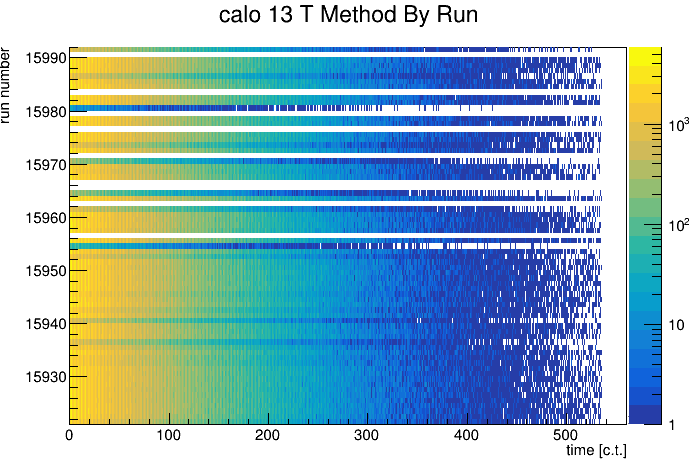

In [35]:
c = r.TCanvas()
wiggleHist.Draw("COLZ")
c.SetLogz()
c.Draw()

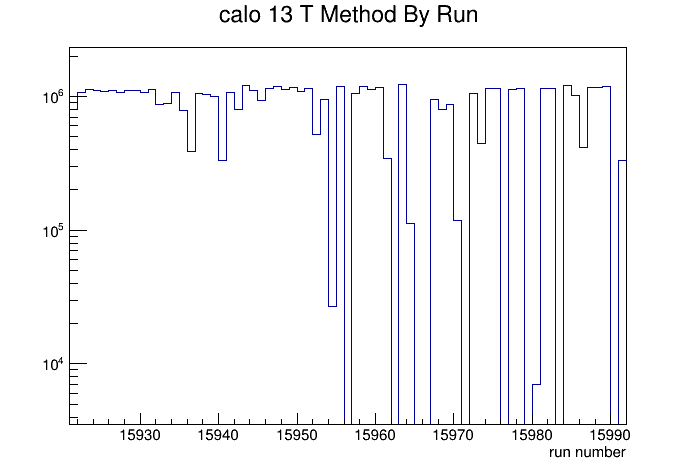

In [36]:
#wiggleHist.GetYaxis().SetRangeUser(15920,15930)
wiggleHist.ProjectionY().Draw()

c.SetLogy()
c.Draw()

In [37]:
# create a map of bin number to run number
print(wiggleHist.GetNbinsY())
runsInWiggle = []
for i in range(1,wiggleHist.GetNbinsY()+1):
    x =  wiggleHist.GetYaxis().GetBinCenter(i) - wiggleHist.GetYaxis().GetBinWidth(i)/2.
    runsInWiggle.append(int(x))
    #print(i, x , x-i )
    
def tobin(run):
    return int(run - (wiggleHist.GetYaxis().GetBinCenter(1) - wiggleHist.GetYaxis().GetBinWidth(1)/2.- 1) )

71


In [38]:
tobin(15951)

31

In [39]:
print(runsInWiggle)

[15921, 15922, 15923, 15924, 15925, 15926, 15927, 15928, 15929, 15930, 15931, 15932, 15933, 15934, 15935, 15936, 15937, 15938, 15939, 15940, 15941, 15942, 15943, 15944, 15945, 15946, 15947, 15948, 15949, 15950, 15951, 15952, 15953, 15954, 15955, 15956, 15957, 15958, 15959, 15960, 15961, 15962, 15963, 15964, 15965, 15966, 15967, 15968, 15969, 15970, 15971, 15972, 15973, 15974, 15975, 15976, 15977, 15978, 15979, 15980, 15981, 15982, 15983, 15984, 15985, 15986, 15987, 15988, 15989, 15990, 15991]


In [40]:
print(goodcalos)

[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23]


In [41]:
allTempHists = []
for i, calo in enumerate(goodcalos): #exclude those with wonky temp readings
    wiggleHist = f.Get("farline").Get("calo"+str(calo)).Get("wiggleByRun").Clone()
    tempHists = []

    for i, group in enumerate(runsByTemp[i][1]):
        if(len(group)<1):
            tempHists.append(9999)
            continue
        h = wiggleHist.ProjectionX().Clone("htemp_"+str(i))
        h.Reset()
        h.SetTitle("Wiggle for Group "+str(i))
        for run in group:
            #print(run, tobin(run),tobin(run+1))
            h2 = wiggleHist.Clone()
            h2.GetYaxis().SetRangeUser(run, run+0.5)
            h3 = h2.ProjectionX("_px",tobin(run),tobin(run+1),"")
            h.Add(h3,1)
        tempHists.append(h.Clone("htemp_"+str(i)))
    allTempHists.append((calo,tempHists))

In [42]:
print(allTempHists)
for tempHists in allTempHists:
    for h in tempHists[1]:
        if(h != 9999):
            print(tempHists[0], h.GetEntries())

[(1, [9999, <ROOT.TH1D object ("htemp_1") at 0x7f48a8281ea0>, <ROOT.TH1D object ("htemp_2") at 0x7f48a2406030>]), (2, [9999, <ROOT.TH1D object ("htemp_1") at 0x7f48a24fa960>, 9999]), (3, [<ROOT.TH1D object ("htemp_0") at 0x7f48a24f38c0>, <ROOT.TH1D object ("htemp_1") at 0x7f48a246c510>, 9999]), (4, [9999, <ROOT.TH1D object ("htemp_1") at 0x7f48a1cdd910>, <ROOT.TH1D object ("htemp_2") at 0x7f48a247fb40>]), (5, [<ROOT.TH1D object ("htemp_0") at 0x7f48a1cde1a0>, <ROOT.TH1D object ("htemp_1") at 0x7f48a1f9c7c0>, 9999]), (6, [<ROOT.TH1D object ("htemp_0") at 0x7f48a1f9c150>, <ROOT.TH1D object ("htemp_1") at 0x7f48a1f9bcf0>, 9999]), (7, [<ROOT.TH1D object ("htemp_0") at 0x7f48a1759930>, <ROOT.TH1D object ("htemp_1") at 0x7f48a1a1a750>, 9999]), (9, [9999, <ROOT.TH1D object ("htemp_1") at 0x7f48a1759d20>, <ROOT.TH1D object ("htemp_2") at 0x7f48a1759380>]), (10, [<ROOT.TH1D object ("htemp_0") at 0x7f48a1cdd360>, <ROOT.TH1D object ("htemp_1") at 0x7f48a11d8090>, 9999]), (11, [9999, <ROOT.TH1D ob

This temp not found


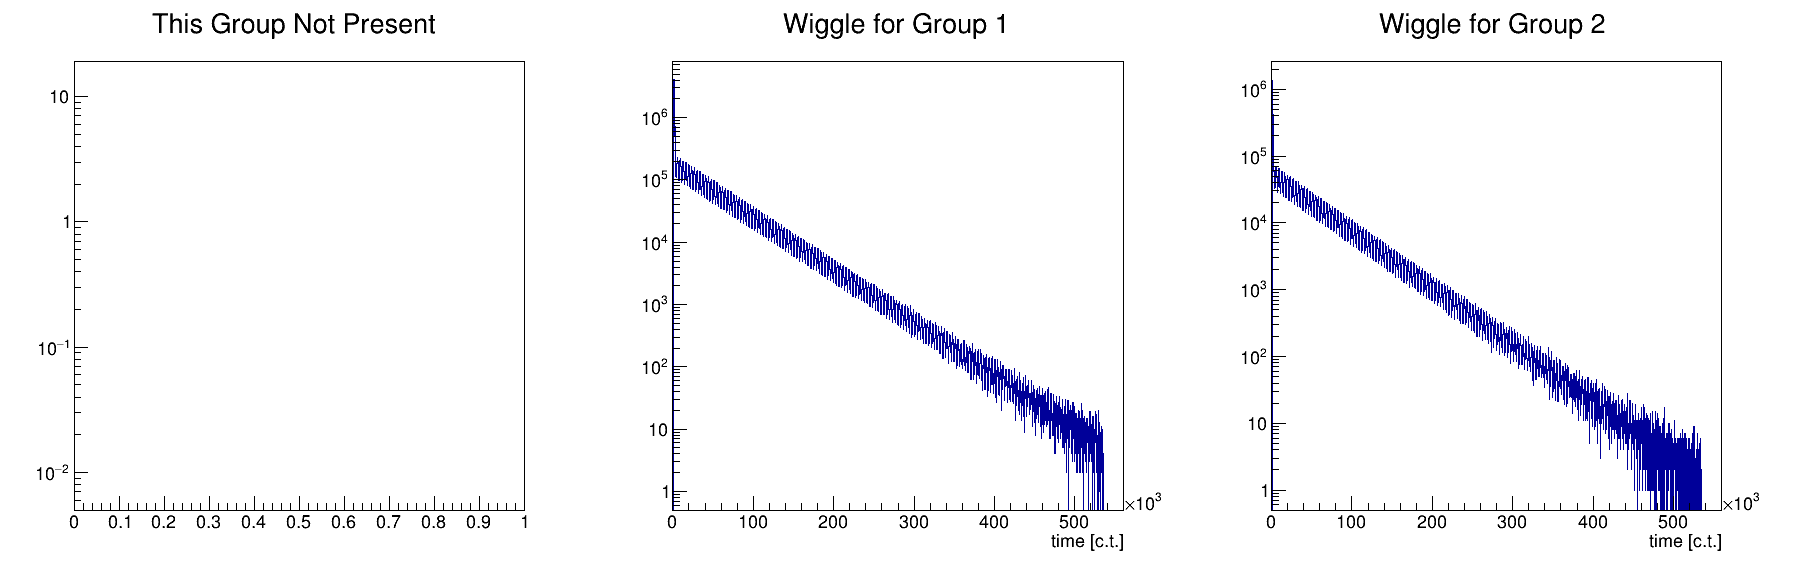

In [43]:
c = r.TCanvas("c","c",1800,600)
h0 = r.TH1D("h0","This Group Not Present",1,0,1)
c.Divide(len(tempHists[1]),1)
for i, h in enumerate(tempHists[1]):
    c.cd(i+1)
    try:
        h.Draw()
    except:
        h0.Draw()
        print("This temp not found")
    r.gPad.SetLogy()
c.Draw()

In [44]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [45]:
func = r.TF1("func", blinded_wiggle, 30,600,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(700000,64.4,0.4,0,0)
func.SetParLimits(4,-0.001 - 2*math.pi,2*math.pi+0.001)
func.SetLineColor(2)
func.SetNpx(2000)

0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas:

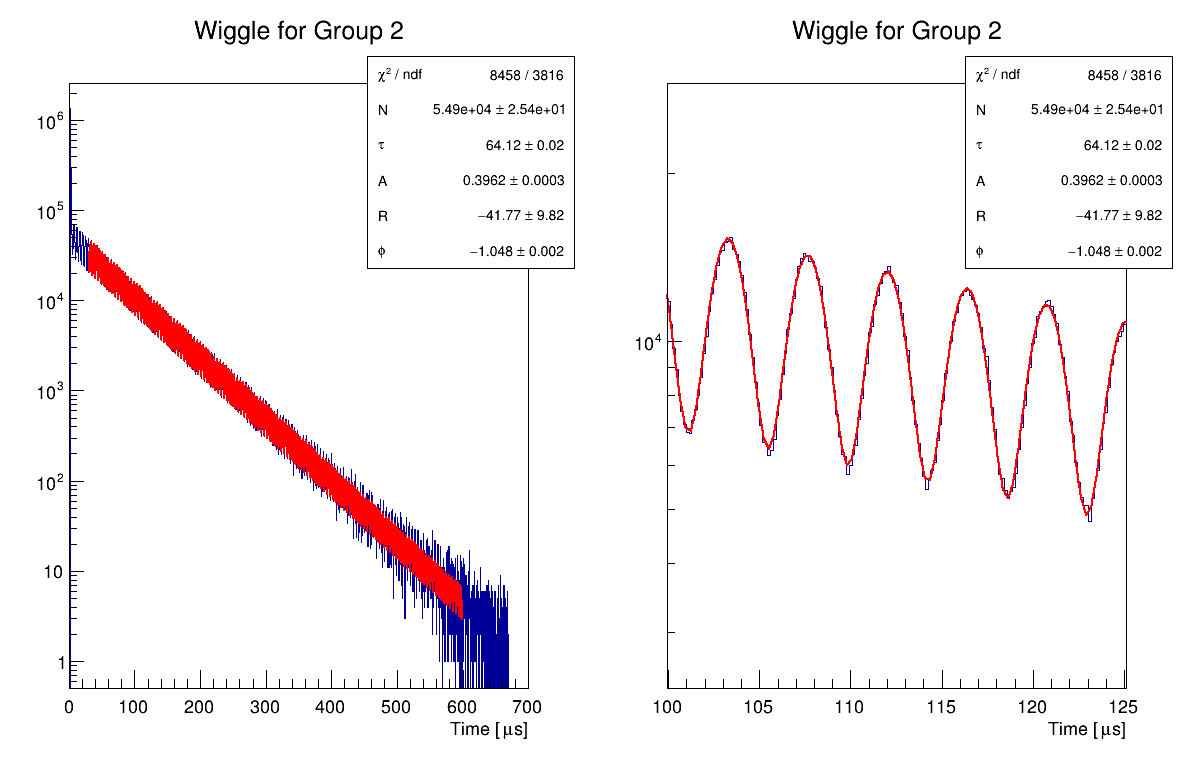

In [46]:
fivePars = []
for j, tempHists in enumerate(allTempHists):
    for group, h in enumerate(tempHists[1]):
        if(h == 9999):
            continue
        c2 = r.TCanvas("c2","c2",1200,800)
        c2.Divide(2,1)
        c2.cd(1)
        r.gPad.SetLogy()

        r.gStyle.SetOptFit(111)
        allCaloWiggle = h.Clone()

        print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
        allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
        print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
        allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

        residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later
        
        func.SetParameters(700000,64.4,0.4,0,0)
        for fit in range(2):
            print("Sarting fit:", fit+1)
            allCaloWiggle.Fit("func","REM")


        fivePars.append([tempHists[0]]+[func.GetParameter(i) for i in range(5)]+[func.GetNDF(),
                      func.GetChisquare()]+[meanTemps[j][1][group]])
        #chiSqAll = ( ( func.GetNDF(),
        #              func.GetChisquare(),
        #              func.GetProb() ) )

        allCaloWiggle.Draw()

        c2.cd(2)
        ding =  allCaloWiggle.Clone()
        ding.GetXaxis().SetRangeUser(100,125)
        ding.Draw()

        r.gPad.SetLogy()
        c2.Draw()

In [47]:
print(fivePars[:3])

[[1, 240342.79322626977, 64.22397357382783, 0.3931001359856453, -4.046766597698252, -1.0573992809945354, 3823, 17050.5034360348, 39.090666452058464], [1, 29555.431001938658, 64.04717676065827, 0.39474113135084943, 41.718044870781696, -1.058387216378402, 3780, 7019.499651210082, 39.63296730265624], [2, 175254.27306295966, 64.198703976565, 0.38482385360698773, 12.59492081652318, -1.0552402182738145, 3823, 13303.452134739562, 39.088042184977965]]


In [48]:
dfFivePars = pandas.DataFrame(fivePars, columns=['calo','N','tau','A','R','phi','ndf','chisq','meantemp'])

In [49]:
dfFivePars['chisq/ndf'] = dfFivePars['chisq'] / dfFivePars['ndf']
dfFivePars.head()

,calo,N,tau,A,R,phi,ndf,chisq,meantemp,chisq/ndf
0,1,240342.793226,64.223974,0.393100,-4.046767,-1.057399,3823,17050.503436,39.090666,4.459980
1,1,29555.431002,64.047177,0.394741,41.718045,-1.058387,3780,7019.499651,39.632967,1.857010
2,2,175254.273063,64.198704,0.384824,12.594921,-1.055240,3823,13303.452135,39.088042,3.479846
3,3,178336.943159,64.218360,0.408221,-9.248528,-1.050921,3823,14931.267710,38.083837,3.905642
4,3,46812.779797,64.051526,0.409151,9.269595,-1.049453,3808,8637.075268,38.670864,2.268140


In [50]:
dfFivePars.describe()

,calo,N,tau,A,R,phi,ndf,chisq,meantemp,chisq/ndf
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,11.315789,124204.619901,64.165067,0.396218,-17.036349,-1.049671,3803.684211,12259.845350,38.800843,3.213706
std,6.316453,70577.793509,0.091498,0.007864,19.065801,0.004664,80.480686,3668.073258,0.630968,0.947609
min,1.000000,2669.938296,63.737694,0.381965,-57.386877,-1.060476,3326.000000,3150.048090,37.768360,0.947098
25%,6.000000,63994.479007,64.138930,0.390364,-27.829953,-1.052687,3817.250000,9421.215794,38.280084,2.471448
50%,11.500000,125447.375141,64.192967,0.395903,-20.391276,-1.048552,3822.000000,11879.770387,38.717544,3.108263
75%,16.000000,175208.933909,64.214192,0.399667,-7.697296,-1.046719,3823.000000,15457.365285,39.299838,4.043255
max,23.000000,272715.272266,64.273541,0.415739,41.718045,-1.040533,3823.000000,19605.381810,39.907947,5.128271


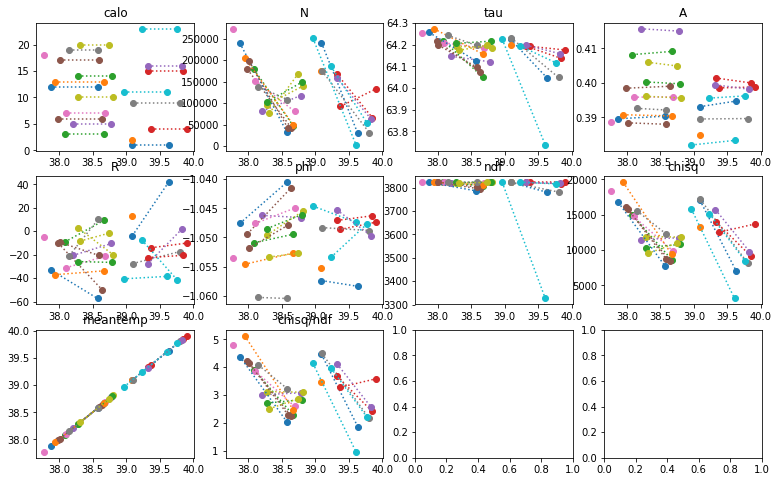

In [51]:
fig,ax = plt.subplots(3,4, figsize=(13,8))
for calo in goodcalos:
    for i, column in enumerate(dfFivePars):
        dfx = dfFivePars.loc[dfFivePars['calo'] == calo]
        ax[int(np.floor(i/4))][i%4].plot(dfx['meantemp'], dfx[column],':o', label='calo '+str(calo))
        ax[int(np.floor(i/4))][i%4].set_title(column)
plt.show()

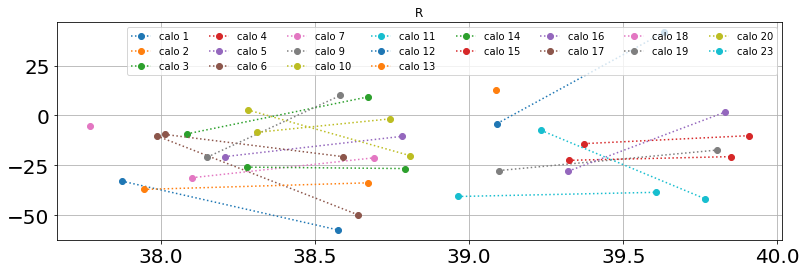

In [52]:
noint()
fig,ax = plt.subplots(figsize=(13,4))
column='R'
for calo in goodcalos:
    dfx = dfFivePars.loc[dfFivePars['calo'] == calo]
    plt.plot(dfx['meantemp'], dfx[column],':o', label='calo '+str(calo))
plt.title(column)
plt.grid()
plt.legend(ncol=8)
#plt.ylim(-100,100)
plt.show()

---

### Not sure that this is strictly Kosher, but we need to up out stats here. Lets try adding all the calos in the temperature range together. First, check which calos end up in which ranges

In [57]:
calos = []
isInRunsVec = []
for i in runsByTemp:
    calo = i[0]
    runsVec = i[1]
    isInRuns = []
    for runs in runsVec:
        if len(runs) > 0:
            isInRuns.append(1)
        else:
            isInRuns.append(0)
    isInRunsVec.append(isInRuns)
    calos.append(calo)

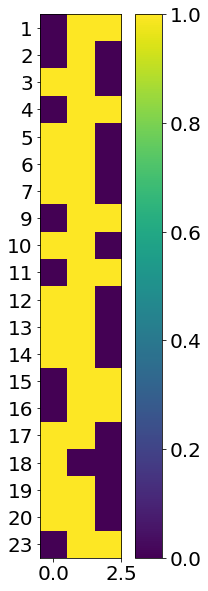

In [68]:
fig, ax = plt.subplots(figsize=(5,10))
ax.set_yticks(np.arange(0, 25, 1))
plt.imshow(isInRunsVec)
plt.colorbar()
ax.set_yticklabels(calos)
plt.show()

### Ok, so it looks like there is good representation from most calos in each group. We can work with this.

In [83]:
print(allTempHists)
allCaloTempHists = []
wiggleHist = f.Get("farline").Get("calo"+str(calo)).Get("wiggleByRun").Clone()
for i in range(len(isInRunsVec[0])):
    h = wiggleHist.ProjectionX().Clone("htemp_"+str(i))
    h.Reset()
    h.SetTitle("All Calorimeters in Group "+str(i)+" Combined Wiggle")
    allCaloTempHists.append(([],h.Clone("htemp_allCalos_"+str(i))))
    
print(allCaloTempHists)

for i, tempHistsi in enumerate(allTempHists):
    calo = tempHistsi[0]
    for j, h in enumerate(tempHistsi[1]):
        if(h == 9999):
            continue
        else:
            allCaloTempHists[j][1].Add(h,1)
            allCaloTempHists[j][0].append(calo)

[(1, [9999, <ROOT.TH1D object ("htemp_1") at 0x7f48a8281ea0>, <ROOT.TH1D object ("htemp_2") at 0x7f48a2406030>]), (2, [9999, <ROOT.TH1D object ("htemp_1") at 0x7f48a24fa960>, 9999]), (3, [<ROOT.TH1D object ("htemp_0") at 0x7f48a24f38c0>, <ROOT.TH1D object ("htemp_1") at 0x7f48a246c510>, 9999]), (4, [9999, <ROOT.TH1D object ("htemp_1") at 0x7f48a1cdd910>, <ROOT.TH1D object ("htemp_2") at 0x7f48a247fb40>]), (5, [<ROOT.TH1D object ("htemp_0") at 0x7f48a1cde1a0>, <ROOT.TH1D object ("htemp_1") at 0x7f48a1f9c7c0>, 9999]), (6, [<ROOT.TH1D object ("htemp_0") at 0x7f48a1f9c150>, <ROOT.TH1D object ("htemp_1") at 0x7f48a1f9bcf0>, 9999]), (7, [<ROOT.TH1D object ("htemp_0") at 0x7f48a1759930>, <ROOT.TH1D object ("htemp_1") at 0x7f48a1a1a750>, 9999]), (9, [9999, <ROOT.TH1D object ("htemp_1") at 0x7f48a1759d20>, <ROOT.TH1D object ("htemp_2") at 0x7f48a1759380>]), (10, [<ROOT.TH1D object ("htemp_0") at 0x7f48a1cdd360>, <ROOT.TH1D object ("htemp_1") at 0x7f48a11d8090>, 9999]), (11, [9999, <ROOT.TH1D ob

In [84]:
allCaloTempHists

[([3, 5, 6, 7, 10, 12, 13, 14, 17, 18, 19, 20],
  <ROOT.TH1D object ("htemp_allCalos_0") at 0x7f489e7a5000>),
 ([1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 23],
  <ROOT.TH1D object ("htemp_allCalos_1") at 0x7f489dbf0500>),
 ([1, 4, 9, 11, 15, 16, 23],
  <ROOT.TH1D object ("htemp_allCalos_2") at 0x7f489dbce520>)]

In [126]:
for i in boundaryTemps:
    print(i)

[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]
[(37.2, 38.4), (38.4, 39.6), (39.6, 40.8)]


In [115]:
dfavg.head()

,calo,run,avgtemp,timestart,timeend,nentries
0,1,15921,38.807412,1524402832,1524405785,98
1,1,15922,38.852164,1524406124,1524409965,129
2,1,15923,38.906977,1524409975,1524413788,127
3,1,15924,38.959471,1524413798,1524417619,127
4,1,15925,38.986003,1524417642,1524421493,129


In [129]:
goodcalos

[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23]

In [131]:
meanTemps = []
for (start, end) in boundaryTemps[0]:
    dfx = dfavg.loc[dfavg['avgtemp'] > start].loc[dfavg['avgtemp'] < end].loc[df['calo'].isin(goodcalos)]
    meanTempi = (dfx['avgtemp']*dfx['nentries']).sum()/(dfx['nentries'].sum())
    print(meanTempi)
    meanTemps.append(meanTempi)

38.01232982287277
38.97073411275697
39.84728242870822


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).


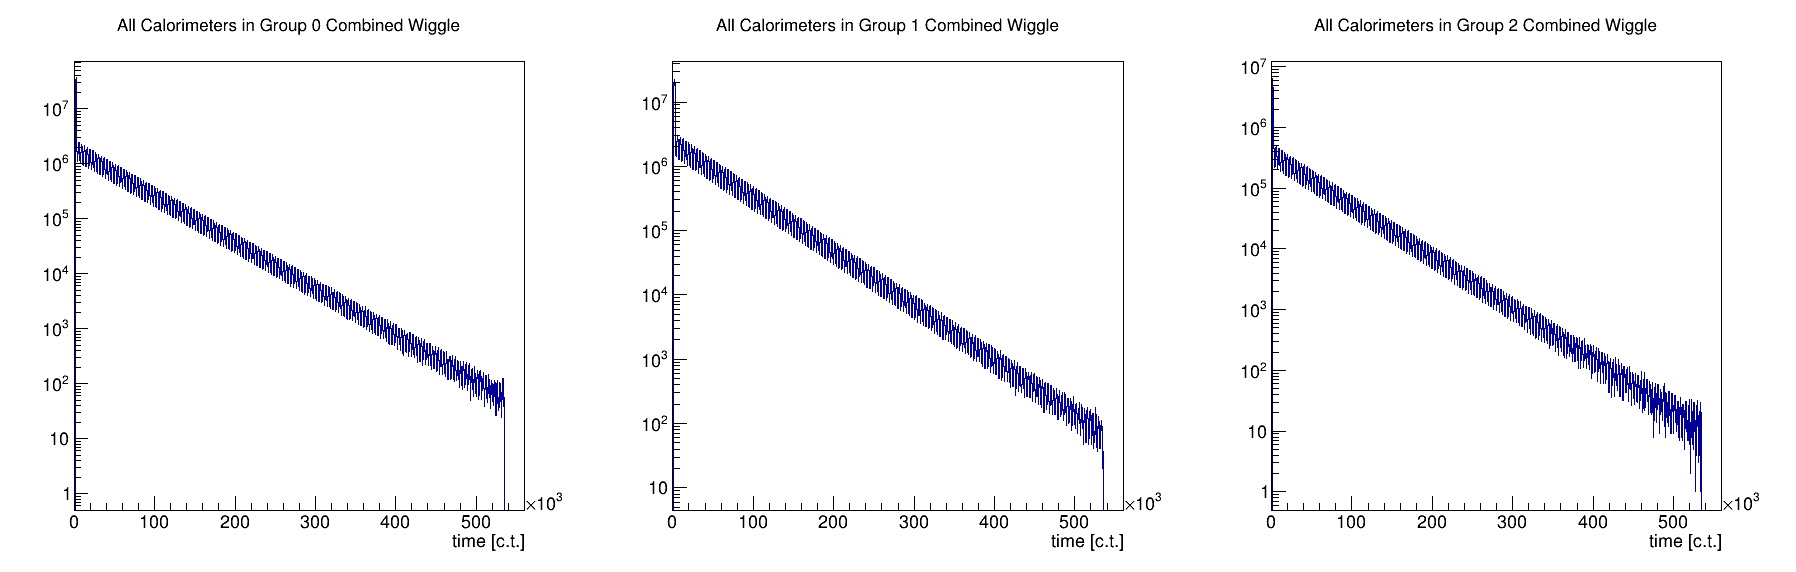

In [85]:
c = r.TCanvas("c","c",1800,600)
h0 = r.TH1D("h0","This Group Not Present",1,0,1)
c.Divide(len(allCaloTempHists),1)
for i, h in enumerate(allCaloTempHists):
    c.cd(i+1)
    try:
        h[1].Draw()
    except:
        h0[1].Draw()
        print("This temp not found")
    r.gPad.SetLogy()
c.Draw()

0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
 FCN=27943.7 FROM MINOS     STATUS=SUCCESSFUL     38 CALLS         549 TOTAL
                     EDM=2.58263e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.91696e+06   1.50650e+02  -6.39130e-03   1.34813e-11
   2  #tau         6.42611e+01   2.84922e-03   6.21518e-08  -1.60697e-06
   3  A            3.95315e-01   5.82182e-05  -2.99185e-09   2.29706e-05
   4  R           -1.79664e+01   1.66723e+00  -1.13622e-05   4.98827e-10
   5  #phi        -1.05132e+00   2.72563e-04   2.72563e-04   6.38276e-04
 FCN=27943.7 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         294 TOTAL
                     EDM=1.26334e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER   

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


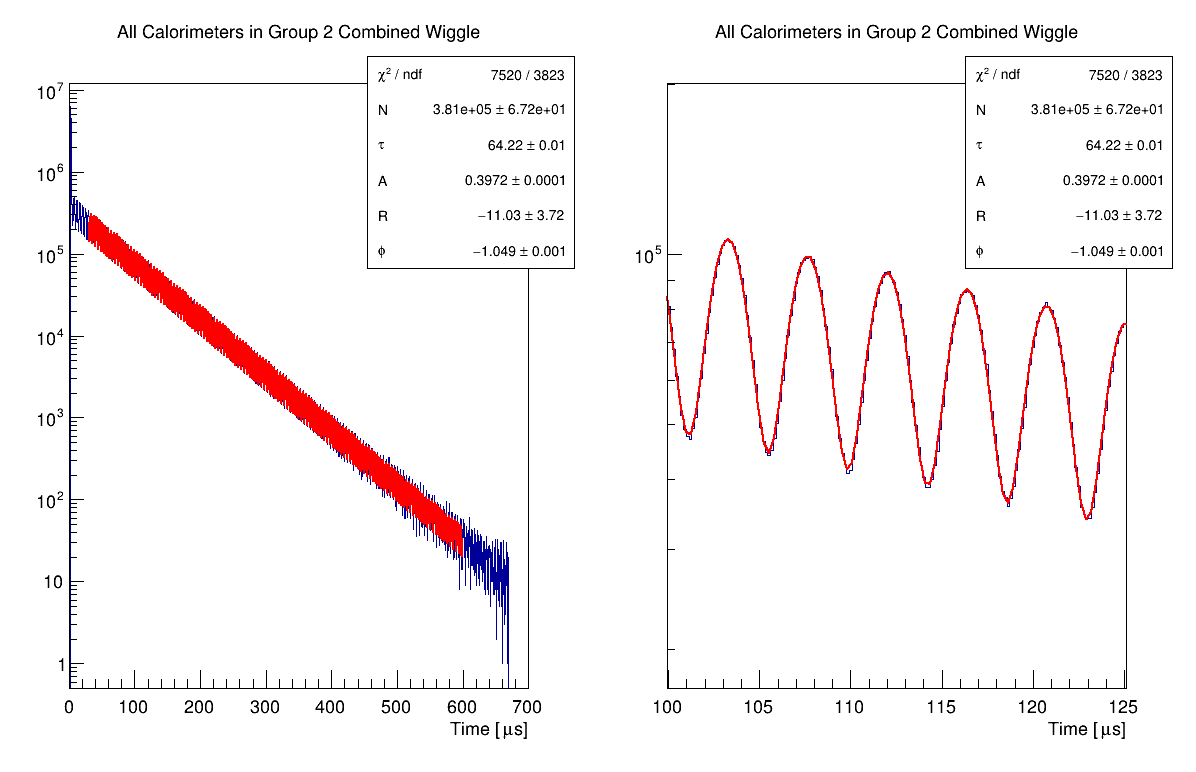

In [132]:
fiveParsAllCalos = []
for j, h in enumerate(allCaloTempHists):
    if(h == 9999):
        continue
    c2 = r.TCanvas("c2","c2",1200,800)
    c2.Divide(2,1)
    c2.cd(1)
    r.gPad.SetLogy()

    r.gStyle.SetOptFit(111)
    allCaloWiggle = h[1].Clone()

    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

    residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

    func.SetParameters(700000,64.4,0.4,0,0)
    for fit in range(2):
        print("Sarting fit:", fit+1)
        allCaloWiggle.Fit("func","REM")


    fiveParsAllCalos.append([h[0]]+[func.GetParameter(i) for i in range(5)]+[func.GetNDF(),
                  func.GetChisquare()]+[meanTemps[j]])
    #chiSqAll = ( ( func.GetNDF(),
    #              func.GetChisquare(),
    #              func.GetProb() ) )

    allCaloWiggle.Draw()

    c2.cd(2)
    ding =  allCaloWiggle.Clone()
    ding.GetXaxis().SetRangeUser(100,125)
    ding.Draw()

    r.gPad.SetLogy()
    c2.Draw()

In [133]:
print(fiveParsAllCalos[:3])

[[[3, 5, 6, 7, 10, 12, 13, 14, 17, 18, 19, 20], 1916958.9125119399, 64.26113185421183, 0.39531503823646497, -17.966376168317804, -1.0513182317769285, 3823, 27943.742027692646, 38.01232982287277], [[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 23], 2418614.8625744893, 64.23720070523186, 0.3951323471956374, -16.26475741967783, -1.0497114099621356, 3823, 15069.821833598366, 38.97073411275697], [[1, 4, 9, 11, 15, 16, 23], 381007.5526542326, 64.21671036715423, 0.3972254522566306, -11.025153023434102, -1.0486680280004457, 3823, 7520.0043920333455, 39.84728242870822]]


In [134]:
dfFiveParsAllCalos = pandas.DataFrame(fiveParsAllCalos, columns=['calos','N','tau','A','R','phi','ndf','chisq','meantemp'])

In [135]:
dfFiveParsAllCalos['chisq/ndf'] = dfFiveParsAllCalos['chisq'] / dfFiveParsAllCalos['ndf']
dfFiveParsAllCalos.head()

,calos,N,tau,A,R,phi,ndf,chisq,meantemp,chisq/ndf
0,"[3, 5, 6, 7, 10, 12, 13, 14, 17, 18, 19, 20]",1.916959e+06,64.261132,0.395315,-17.966376,-1.051318,3823,27943.742028,38.012330,7.309375
1,"[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...",2.418615e+06,64.237201,0.395132,-16.264757,-1.049711,3823,15069.821834,38.970734,3.941884
2,"[1, 4, 9, 11, 15, 16, 23]",3.810076e+05,64.216710,0.397225,-11.025153,-1.048668,3823,7520.004392,39.847282,1.967043


In [136]:
dfFiveParsAllCalos.describe()

,N,tau,A,R,phi,ndf,chisq,meantemp,chisq/ndf
count,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000
mean,1.572194e+06,64.238348,0.395891,-15.085429,-1.049899,3823.0,16844.522751,38.943449,4.406101
std,1.061653e+06,0.022233,0.001159,3.617770,0.001335,0.0,10326.879357,0.917781,2.701250
min,3.810076e+05,64.216710,0.395132,-17.966376,-1.051318,3823.0,7520.004392,38.012330,1.967043
25%,1.148983e+06,64.226956,0.395224,-17.115567,-1.050515,3823.0,11294.913113,38.491532,2.954463
50%,1.916959e+06,64.237201,0.395315,-16.264757,-1.049711,3823.0,15069.821834,38.970734,3.941884
75%,2.167787e+06,64.249166,0.396270,-13.644955,-1.049190,3823.0,21506.781931,39.409008,5.625630
max,2.418615e+06,64.261132,0.397225,-11.025153,-1.048668,3823.0,27943.742028,39.847282,7.309375


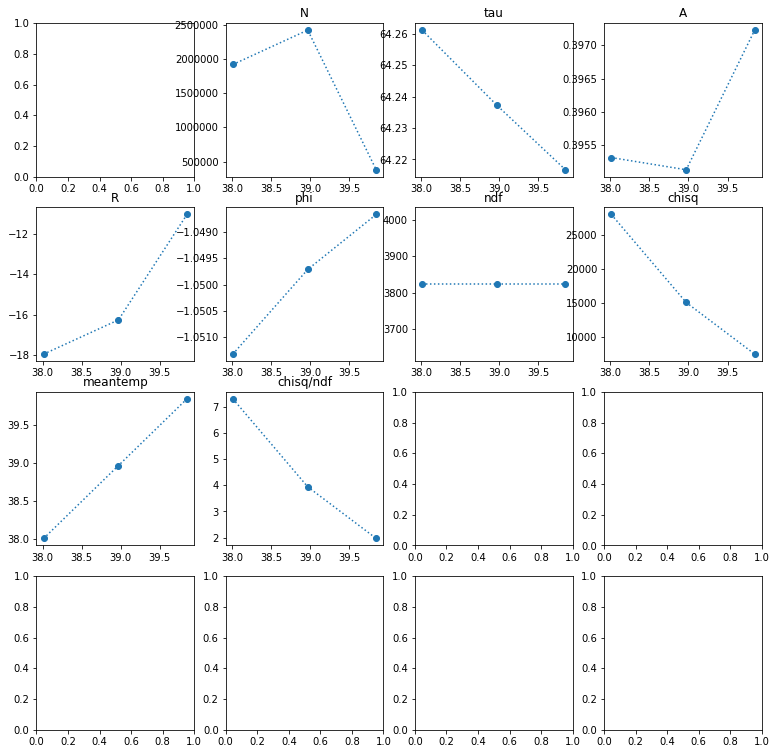

In [137]:
setint()
fig,ax = plt.subplots(4,4, figsize=(13,13))
for i, column in enumerate(dfFiveParsAllCalos):
    try:
        ax[int(np.floor(i/4))][i%4].plot(dfFiveParsAllCalos['meantemp'], dfFiveParsAllCalos[column],':o')
        ax[int(np.floor(i/4))][i%4].set_title(column)
    except:
        continue
plt.show()

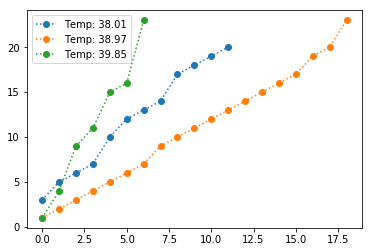

In [150]:
for i, row in dfFiveParsAllCalos.iterrows():
    plt.plot(row['calos'],':o',label="Temp: "+str(round(meanTemps[i],2)))
plt.legend()
plt.show()